   
# #PyCon2019: Hello World of Machine Learning with Scikit-learn


## [11] - Exercise - Mapping Application


<br/><br/>

___Given: Set of hospitals in a geographic location___

<br/>

___Find: The nearest hospital from a point___

<br/><br/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
location = np.array([[1.5,1.0],   # 0 
                   [1.5,6],     # 1
                   [3.5,3],     # 2
                   [2.5,3],     # 3
                   [4,4],       # 4
                   [5,2],       # 5
                   [6,3.5],     # 6
                   [7,4]])      # 7

<br/>

___Let's plot the points___

<br/>

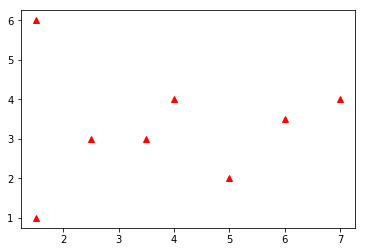

In [3]:
plt.plot(location[:,0], location[:,1], "r^")

<br/><br/>

___Let's first find the same using KNN___

<br/><br/>


In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn  = KNeighborsClassifier(1)

___Let's generate a label for each of the data Points___

In [6]:
y_label = np.array([0,1,2,3,4,5,6,7]) # let's assume they are hospital number "0" to hospital number "7"

In [7]:
knn.fit(location,y_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
check_loc = np.array([[1,7], [8,2]]).reshape(-1,2)
predict = knn.predict(check_loc)
check_loc

array([[1, 7],
       [8, 2]])

In [9]:
predict

array([1, 7])

<br/><br/>

___index => 1 is nearest to [1,7] and index =>7 is nearest to [8,2]___

<br/><br/>

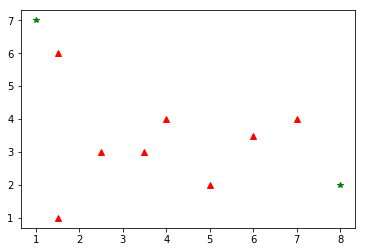

In [10]:
plt.plot(location[:,0], location[:,1], "r^")
plt.plot(check_loc[:,0], check_loc[:,1], "g*")

<br/><br/><br/><br/><br/><br/>

### Machine Learning Vs Data Structures